<a href="https://colab.research.google.com/github/bimalpokhrel/spatial-data-analysis/blob/main/raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install rasterio==1.2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import rasterio

In [4]:
rasterio.__version__

'1.2.6'

In [5]:
# read raster data
in_img=r"/content/raster/nepal_lc_2020.tif"
ds=rasterio.open(in_img)
ds
data=ds.read()

In [9]:
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [10]:
# read meta data
ds.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [11]:
ds.count

1

In [7]:
data.size

4354020

In [8]:
ds.name

'/content/raster/nepal_lc_2020.tif'

In [9]:
ds.crs

CRS.from_epsg(4326)

In [10]:
ds.transform

Affine(0.0027777777777780012, 0.0, 80.05847091000004,
       0.0, -0.0027777777777780012, 30.472819010000357)

In [11]:
ds.shape

(1485, 2932)

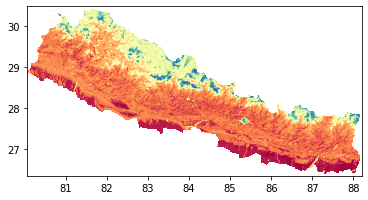

In [19]:
# visualization
from rasterio.plot import show,show_hist
show(ds,cmap="Spectral")
# spectral color map

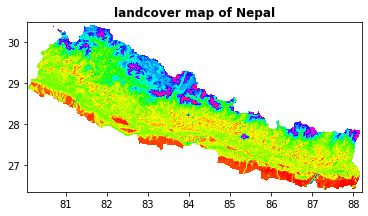

In [18]:
# for other color map
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
show(ds,cmap="hsv",title="landcover map of Nepal")

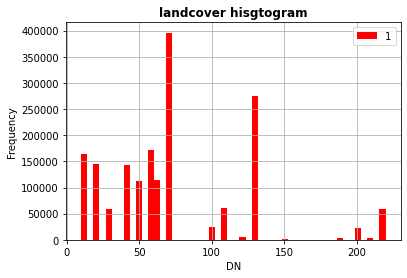

In [22]:
# for histogram data 
show_hist(ds,bins=50,title="landcover hisgtogram")
# it means 70 dn class which is also called vegtation forest is more in nepal

In [28]:
with rasterio.open(r"/content/output/rater.tif","w",
                   driver=ds.driver,
                   height=ds.height,
                   width=ds.width,
                   count= ds.count,
                   crs=ds.crs,
                   transform=ds.transform,
                   dtype=data.dtype,
                   ) as dst:
                   dst.write(data)
                  #  write data